In [1]:
# Let's import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('data/marketing_campaigns_clean.csv')

**¿Qué canal de marketing se utiliza con mayor frecuencia y cuál genera mejor ROI?**


Objetivo: Analiza la distribución de canales y compara su rendimiento en términos de ROI y otros indicadores clave.

Enfoque sugerido: Combina análisis de frecuencia con métricas de rendimiento para identificar no solo los canales más utilizados sino también los más efectivos. Considera segmentar por tipo de campaña o audiencia para un análisis más detallado.

Visualizaciones recomendadas: Gráfico de barras para frecuencia y diagrama de caja para distribución de ROI por canal**

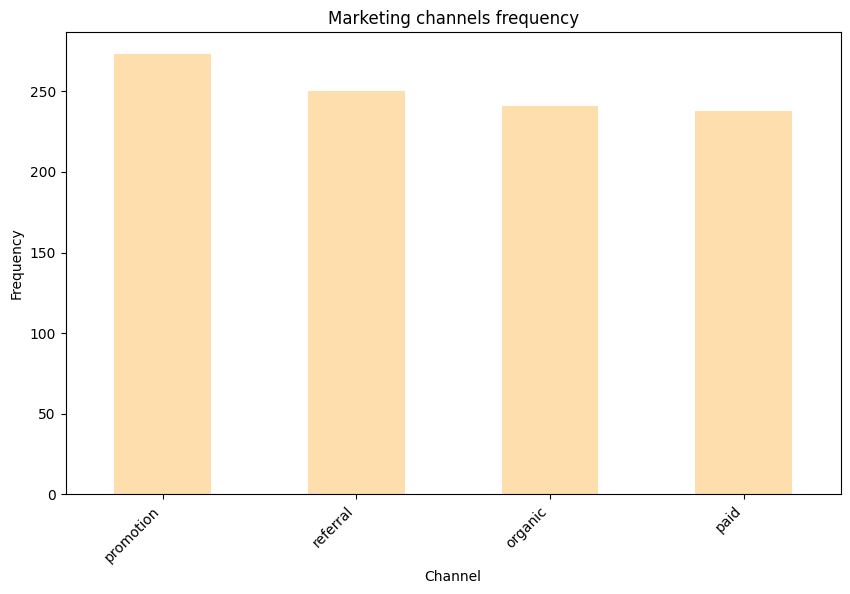

More frequent channels:
channel
promotion    273
referral     250
organic      241
paid         238
Name: count, dtype: int64


C:\Users\ignac\AppData\Local\Temp\ipykernel_13976\2643853156.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'channel', y = 'roi', data = df, palette = 'pastel')


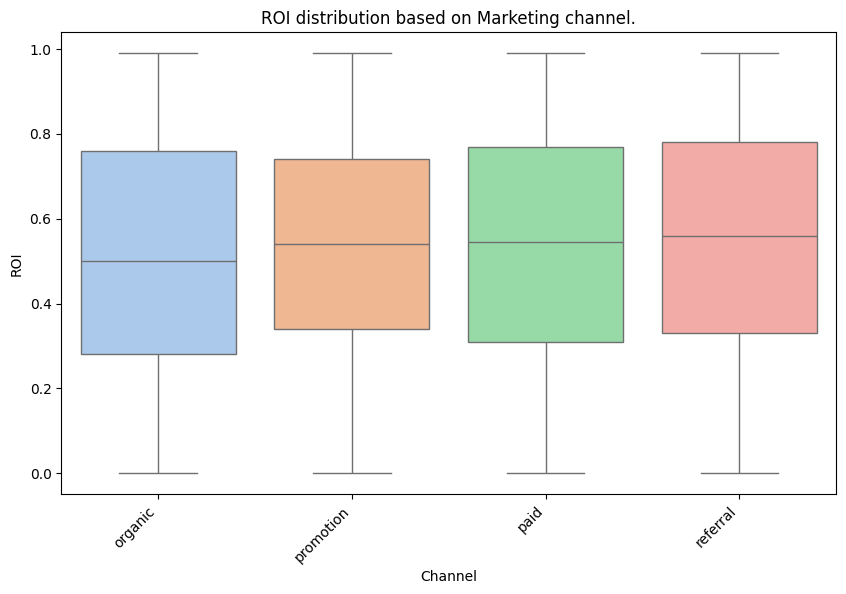

Best ROI per channel:


channel
referral     0.551560
paid         0.540210
promotion    0.535714
organic      0.517801
Name: roi, dtype: float64

In [11]:
# Let's calculate the most frequent channel
channel_frequency = df['channel'].value_counts()

# Now the roi per kind of channel
roi_by_channel = df.groupby('channel')['roi'].mean().sort_values(ascending=False)

# We will use a barplot for checking the frequency
plt.figure(figsize = (10,6))
channel_frequency.plot(kind ='bar', color = 'navajowhite')
plt.title('Marketing channels frequency')
plt.xlabel('Channel')
plt.ylabel('Frequency')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

print("More frequent channels:")
print(channel_frequency)


# And we will use a boxplot for analyzing the roi distribution based on the channel
plt.figure(figsize = (10,6))
sns.boxplot(x = 'channel', y = 'roi', data = df, palette = 'pastel')
plt.title('ROI distribution based on Marketing channel.')
plt.xlabel('Channel')
plt.ylabel('ROI')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

print("Best ROI per channel:")
roi_by_channel

We can see the most used channel is promotion and the channel that has the best ROI is the referral one.

Podemos ver que el canal más usado es el de "promotion" y el que ofrece mejor ROI es el de "referral".

**¿Qué tipo de campaña genera más ingresos en promedio y cuál tiene mejor conversión?**

Objetivo: Compara los diferentes tipos de campaña para identificar cuáles generan más ingresos y tienen mejor tasa de conversión.

Enfoque sugerido: Analiza el rendimiento financiero (ingresos, beneficio neto) y las métricas de efectividad (tasa de conversión, ROI) por tipo de campaña. Busca si existen relaciones entre estas métricas que puedan explicar el éxito de ciertos tipos.

Visualizaciones recomendadas: Gráfico de barras para ingresos promedio y tasa de conversión por tipo, diagrama de dispersión para correlación entre estas métricas

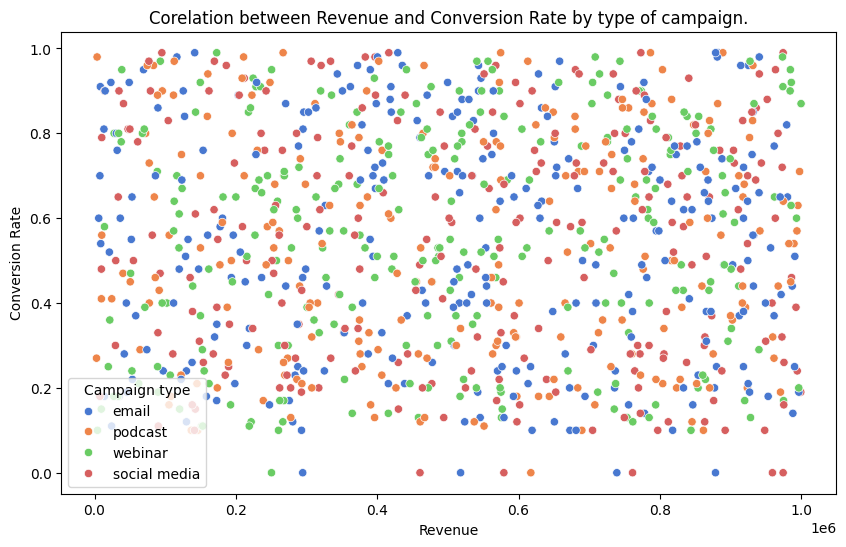

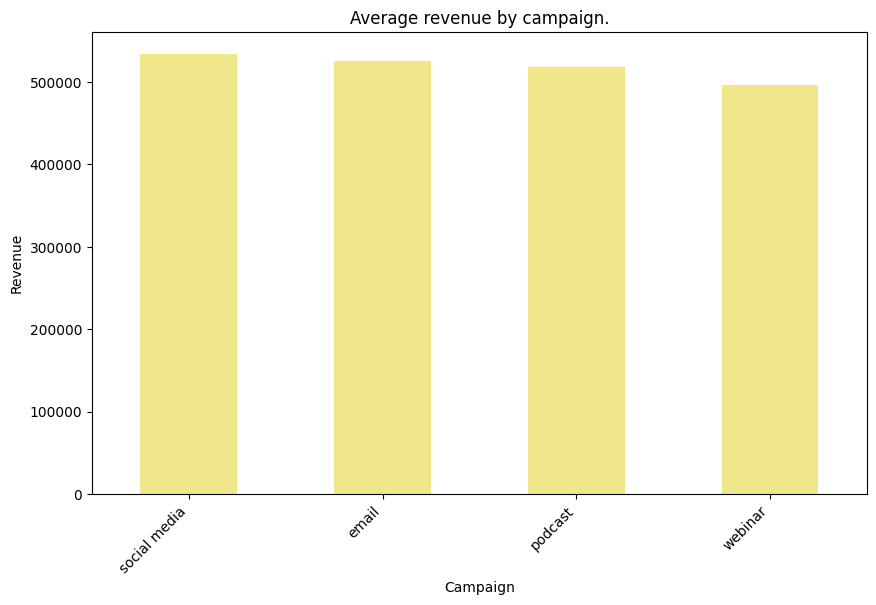

Average revenue by campaign:
type
social media    533772.770129
email           524763.544107
podcast         517894.740395
webinar         495771.704618
Name: revenue, dtype: float64


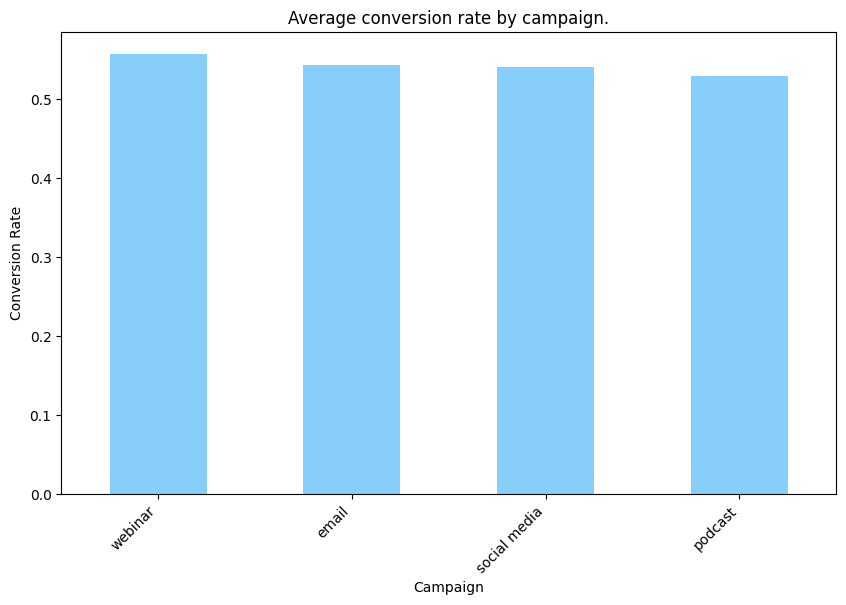

Average conversion rate by campaign:
type
webinar         0.557328
email           0.543750
social media    0.540474
podcast         0.529035
Name: conversion_rate, dtype: float64


In [15]:
# We will calculate the revenue per campaign
revenue_by_type = df.groupby('type')['revenue'].mean().sort_values(ascending = False)

# Now the best conversion rate per campaign
conversion_by_type = df.groupby('type')['conversion_rate'].mean().sort_values(ascending = False)

# We will create a scatter graph to see the correlation between revenue and conversion rate
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'revenue', y = 'conversion_rate', data = df, hue = 'type', palette = 'muted')
plt.title('Corelation between Revenue and Conversion Rate by type of campaign.')
plt.xlabel('Revenue')
plt.ylabel('Conversion Rate')
plt.legend(title = 'Campaign type')
plt.show()

# Now a bar graph to see the revenue by campaign
plt.figure(figsize=(10,6))
revenue_by_type.plot(kind='bar', color='khaki')
plt.title('Average revenue by campaign.')
plt.xlabel('Campaign')
plt.ylabel('Revenue')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

print('Average revenue by campaign:')
print(revenue_by_type)

# Now the conversion rate by campaign
plt.figure(figsize=(10,6))
conversion_by_type.plot(kind='bar', color = 'lightskyblue')
plt.title('Average conversion rate by campaign.')
plt.xlabel('Campaign')
plt.ylabel('Conversion Rate')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

print('Average conversion rate by campaign:')
print(conversion_by_type)


Social Media is the campaign type which is providing more revenue and webinar is the one who is having more conversion rate.

El tipo de campaña "social media" es la que genera más ingresos promedio y las campañas "webinar" son las que mejor tasa de conversión tienen.